In [1]:
import matplotlib.pyplot as plt

import matplotlib
%matplotlib inline
from sklearn.datasets import load_digits

In [2]:
# 한글
from matplotlib import font_manager, rc
font_loc = "C:/Windows/Fonts/malgunbd.ttf"
font_name = font_manager.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font', family=font_name)

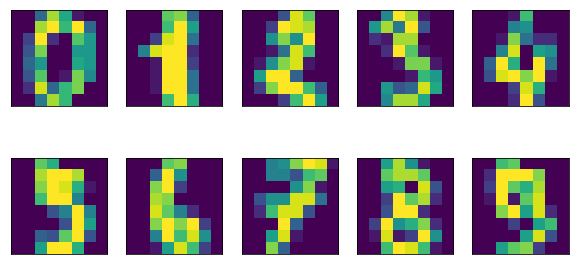

In [3]:
digits = load_digits()

fig, axes = plt.subplots(2,5, figsize=(10,5),
        subplot_kw = {'xticks':(), 'yticks':()})
for ax, img in zip(axes.ravel(), digits.images):
        ax.imshow(img)

In [4]:
print(digits.data.shape) # 1797행, 64열(8*8) - 1797개 8x8 픽셀정보
print(digits.data[1:5])
print(digits.DESCR)
print(digits.images[1:5])
print(digits.images.shape)
print(digits.target[1:15])
print(digits.target.shape)
print(digits.target_names)

(1797, 64)
[[ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]
 [ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
   1. 13. 13.  0.  0.  0.  0.  0.  2. 15. 11.  1.  0.  0.  0.  0.  0.  1.
  12. 12.  1.  0.  0.  0.  0.  0.  1. 10.  8.  0.  0.  0.  8.  4.  5. 14.
   9.  0.  0.  0.  7. 13. 13.  9.  0.  0.]
 [ 0.  0.  0.  1. 11.  0.  0.  0.  0.  0.  0.  7.  8.  0.  0.  0.  0.  0.
   1. 13.  6.  2.  2.  0.  0.  0.  7. 15.  0.  9.  8.  0.  0.  5. 16. 10.
   0. 16.  6.  0.  0.  4. 15. 16. 13. 16.  1. 

Text(0,0.5,'두 번째 주성분')

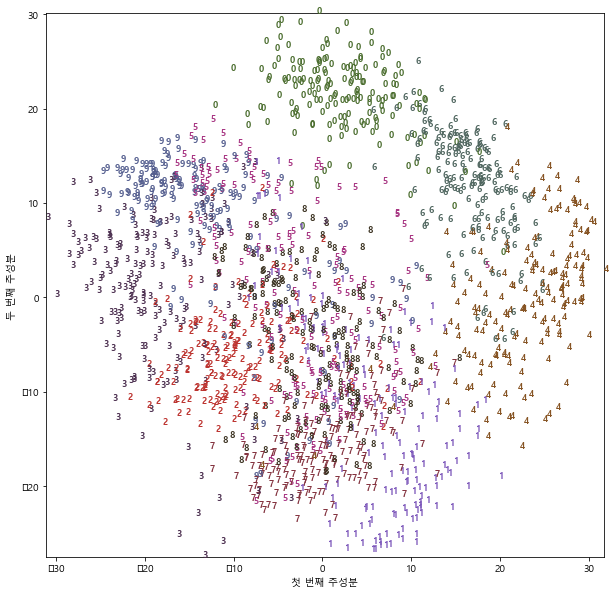

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(digits.data)
# 처음 두 개의 주성분으로 숫자 데이터를 변환한다.
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
 "#A83683", "#4E655E", "#853541", "#3A3120","#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
 # 숫자 텍스트를 이용해 산점도를 그립니다
 plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
 color = colors[digits.target[i]],
 fontdict={'weight': 'bold', 'size': 9})

plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

In [6]:
from sklearn.manifold import TSNE
tsne =TSNE(random_state=12)
d_tsne = tsne.fit_transform(digits.data)

In [7]:
print(digits.data.shape)
print(d_tsne.shape)

(1797, 64)
(1797, 2)


In [8]:
print(d_tsne[:,0].shape)

(1797,)


In [9]:
d_tsne.shape

(1797, 2)

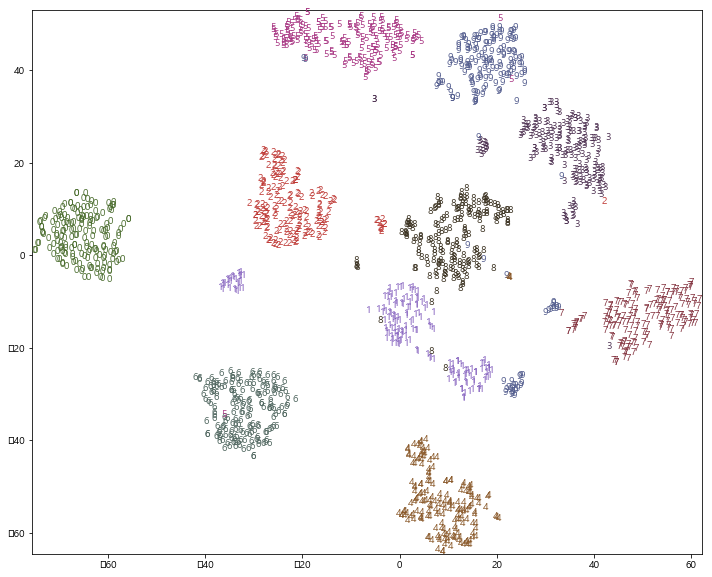

In [13]:
plt.figure(figsize=(12,10))
plt.xlim(d_tsne[:,0].min(),d_tsne[:,0].max()+1)#x축 법위 설정 
plt.ylim(d_tsne[:,1].min(),d_tsne[:,1].max()+1)# y 축 범위 설정 

for i in range(len(digits.data)):
    plt.text(d_tsne[i,0],
             d_tsne[i,1],
             str(digits.target[i]),
             color =colors[digits.target[i]],
             )
